In [1]:
#install relevant packages
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

  Obtaining dependency information for statsbombpy from https://files.pythonhosted.org/packages/1a/ea/acce7c1f80bbbe3c50ac80e911bf6f367e465e4633f1031eb8ca0853a1a2/statsbombpy-1.14.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency information for requests-cache from https://files.pythonhosted.org/packages/4e/2e/8f4051119f460cfc786aa91f212165bb6e643283b533db572d7b33952bd2/requests_cache-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for inflect from https://files.pythonhosted.org/packages/f7/e0/c5684d7c058d8f2a9210c322dee32bd025c11d19e5ba23c82ac9188253f9/inflect-7.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for typeguard>=4.0.1 from https://files.pythonhosted.org/packages/f2/53/9465dedf2d69fe26008e7732cf6e0a385e387c240869e7d54eed49782a3c/typeguard-4.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for cattrs>=22.2 from https://files.pythonhosted.org/pa

In [2]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

# Load Competiton, Match, and Event Data from statsbombpy

In [3]:
#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [11]:
#call the statsbombpy API to get a list of matches for a given competition
#Euro 2024 competition id, season id
#competition_id=55, season_id=282
pl = sb.matches(competition_id=2, season_id=27)

#print the first 5 matches listed
pl.head(380)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [14]:
#create a variable for the team you want to look into
team="Leicester City"

#filter for only matches that the focus team played in
matches_df = pl[(pl['home_team']==team) | (pl['away_team']==team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=True)

TypeError: events() got an unexpected keyword argument 'competition_id'

In [16]:
matches_df.head(38)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
124,3754237,2015-08-08,16:00:00.000,England - Premier League,2015/2016,Leicester City,Sunderland,4,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,King Power Stadium,Lee Mason,Claudio Ranieri,Dick Advocaat,1.1.0,2,2
178,3754203,2015-08-15,16:00:00.000,England - Premier League,2015/2016,West Ham United,Leicester City,1,2,available,...,2021-06-13T16:17:31.694,2,Regular Season,Boleyn Ground,Anthony Taylor,Slaven Bilić,Claudio Ranieri,1.1.0,2,2
183,3753987,2015-08-22,16:00:00.000,England - Premier League,2015/2016,Leicester City,Tottenham Hotspur,1,1,available,...,2021-06-13T16:17:31.694,3,Regular Season,King Power Stadium,Martin Atkinson,Claudio Ranieri,Mauricio Roberto Pochettino Trossero,1.1.0,2,2
41,3754023,2015-08-29,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Leicester City,1,1,available,...,2021-06-13T16:17:31.694,4,Regular Season,Vitality Stadium,Neil Swarbrick,Eddie Howe,Claudio Ranieri,1.1.0,2,2
67,3754106,2015-09-13,17:00:00.000,England - Premier League,2015/2016,Leicester City,Aston Villa,3,2,available,...,2021-06-13T16:17:31.694,5,Regular Season,King Power Stadium,Mike Dean,Claudio Ranieri,Tim Sherwood,1.1.0,2,2
21,3754146,2015-09-19,16:00:00.000,England - Premier League,2015/2016,Stoke City,Leicester City,2,2,available,...,2021-06-13T16:17:31.694,6,Regular Season,bet365 Stadium,Andre Marriner,Mark Hughes,Claudio Ranieri,1.1.0,2,2
83,3754174,2015-09-26,16:00:00.000,England - Premier League,2015/2016,Leicester City,Arsenal,2,5,available,...,2021-06-13T16:17:31.694,7,Regular Season,King Power Stadium,Craig Pawson,Claudio Ranieri,Arsène Wenger,1.1.0,2,2
145,3754335,2015-10-03,16:00:00.000,England - Premier League,2015/2016,Norwich City,Leicester City,1,2,available,...,2021-06-13T16:17:31.694,8,Regular Season,Carrow Road,Mark Clattenburg,Alex Neil,Claudio Ranieri,1.1.0,2,2
159,3754302,2015-10-17,16:00:00.000,England - Premier League,2015/2016,Southampton,Leicester City,2,2,available,...,2021-06-13T16:17:31.694,9,Regular Season,St. Mary''s Stadium,Paul Tierney,Ronald Koeman,Claudio Ranieri,1.1.0,2,2
135,3754263,2015-10-24,16:00:00.000,England - Premier League,2015/2016,Leicester City,Crystal Palace,1,0,available,...,2021-06-13T16:17:31.694,10,Regular Season,King Power Stadium,Mike Dean,Claudio Ranieri,Alan Pardew,1.1.0,2,2


In [ ]:
#create a variable containing the first match id in the data frame
latest_match_id = matches_df.match_id.iloc[0]

#latest_match_id=3943043

In [18]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=3754261)

#print the first 5 rows of data
events_df.head(20)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Arsenal,1,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Leicester City,22,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Leicester City,22,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Leicester City,22,00:00:00.000,Half Start,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:01.653,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:02.052,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:03.611,Pass,True
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Leicester City,22,00:00:20.796,Pass,NaN


In [19]:
#print a list of columns available in the event data
events_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_success_in_play',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assi

In [20]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

# Example One: Passes and Carries into the Final Third

"Which players progressed the ball into the final third the most?"

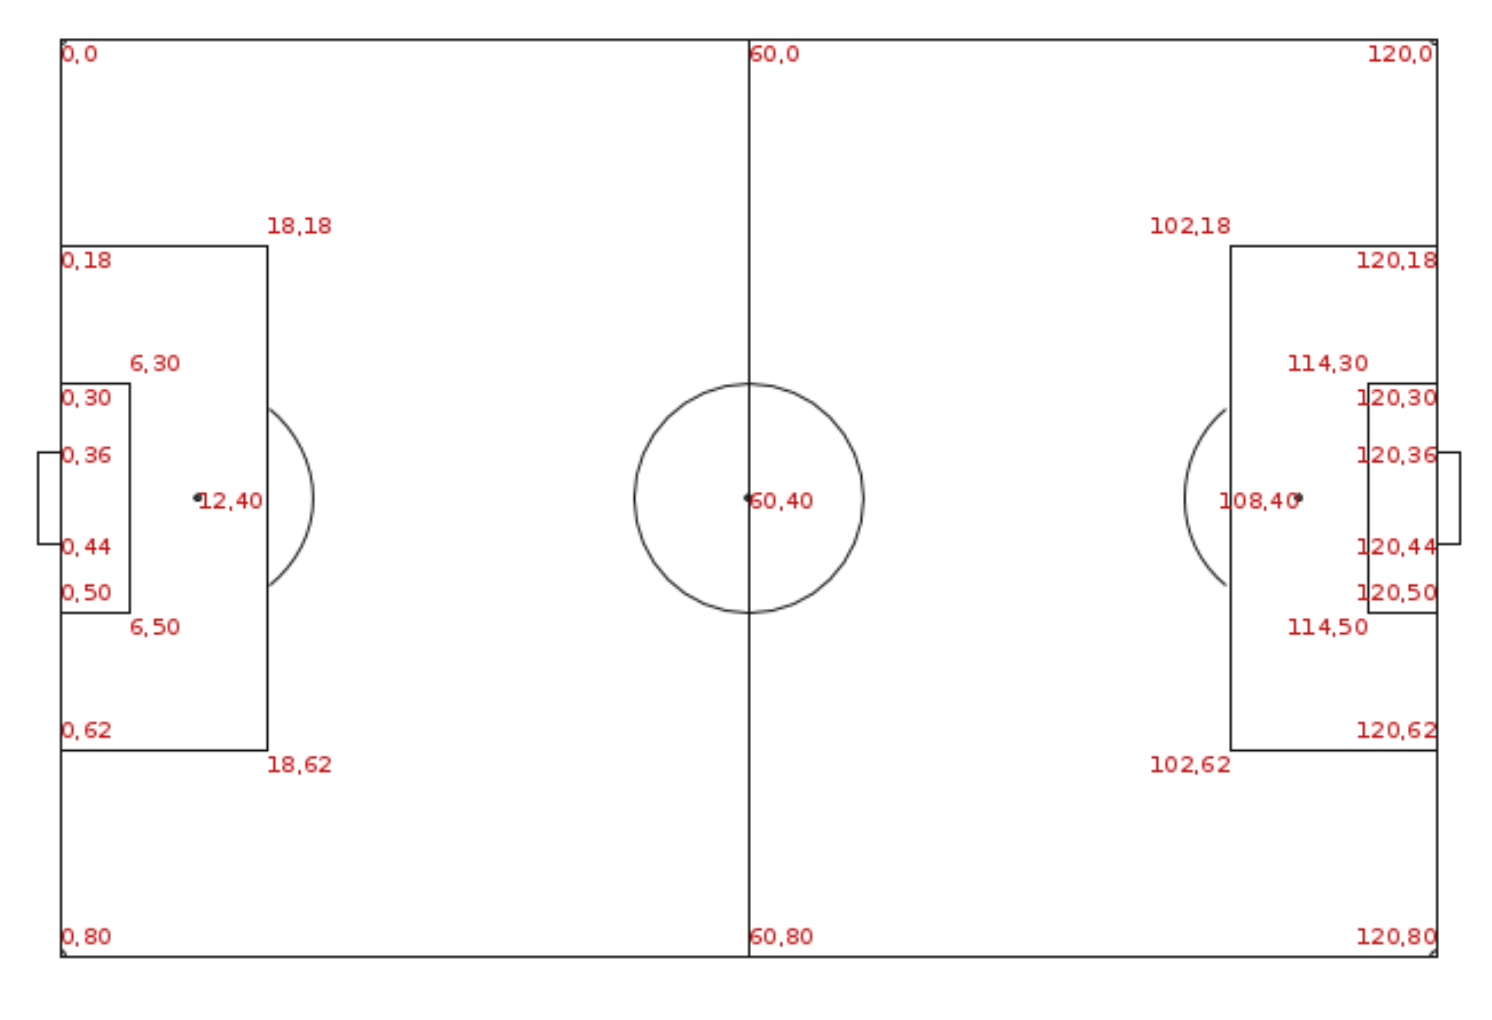

## Data Manipulation

In [21]:
events_df.pass_outcome.unique()

array([nan, 'Incomplete', 'Out', 'Pass Offside', 'Unknown'], dtype=object)

In [22]:
#filter for events done by the focus team
#filter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes
f3rd_passes=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]

#get count for each player
f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

In [23]:
f3rd_passes_count

,player,0
0,Christian Fuchs,1
1,Danny Drinkwater,6
2,Danny Simpson,1
3,Marc Albrighton,4
4,N''Golo Kanté,4


In [24]:
#rename second column
f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes" }, inplace = True)

In [25]:
f3rd_passes_count

,player,Passes
0,Christian Fuchs,1
1,Danny Drinkwater,6
2,Danny Simpson,1
3,Marc Albrighton,4
4,N''Golo Kanté,4


In [26]:
#get final third carries for focus team
f3rd_carries=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]

#get count for each player
f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

#rename second column
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

In [27]:
f3rd_carries_count

,player,Carries
0,Danny Drinkwater,1
1,Demarai Gray,1
2,Jamie Vardy,1
3,Marc Albrighton,4
4,Riyad Mahrez,2
5,Shinji Okazaki,1


In [28]:
#combine dataframes
progressions_df=pd.merge(f3rd_passes_count, f3rd_carries_count,
                    how="outer", on=["player"])

In [29]:
progressions_df

,player,Passes,Carries
0,Christian Fuchs,1.0,NaN
1,Danny Drinkwater,6.0,1.0
2,Danny Simpson,1.0,NaN
3,Marc Albrighton,4.0,4.0
4,N''Golo Kanté,4.0,NaN
5,Demarai Gray,NaN,1.0
6,Jamie Vardy,NaN,1.0
7,Riyad Mahrez,NaN,2.0
8,Shinji Okazaki,NaN,1.0


In [30]:
#add 0 where value is NaN
progressions_df=progressions_df.fillna(0)

In [31]:
progressions_df

,player,Passes,Carries
0,Christian Fuchs,1.0,0.0
1,Danny Drinkwater,6.0,1.0
2,Danny Simpson,1.0,0.0
3,Marc Albrighton,4.0,4.0
4,N''Golo Kanté,4.0,0.0
5,Demarai Gray,0.0,1.0
6,Jamie Vardy,0.0,1.0
7,Riyad Mahrez,0.0,2.0
8,Shinji Okazaki,0.0,1.0


In [32]:
#add a new column with the total
progressions_df['total']=progressions_df['Passes']+progressions_df['Carries']

In [33]:
progressions_df

,player,Passes,Carries,total
0,Christian Fuchs,1.0,0.0,1.0
1,Danny Drinkwater,6.0,1.0,7.0
2,Danny Simpson,1.0,0.0,1.0
3,Marc Albrighton,4.0,4.0,8.0
4,N''Golo Kanté,4.0,0.0,4.0
5,Demarai Gray,0.0,1.0,1.0
6,Jamie Vardy,0.0,1.0,1.0
7,Riyad Mahrez,0.0,2.0,2.0
8,Shinji Okazaki,0.0,1.0,1.0


In [34]:
progressions_df.sort_values(by='total', ascending=False, inplace=True)

In [35]:
progressions_df

,player,Passes,Carries,total
3,Marc Albrighton,4.0,4.0,8.0
1,Danny Drinkwater,6.0,1.0,7.0
4,N''Golo Kanté,4.0,0.0,4.0
7,Riyad Mahrez,0.0,2.0,2.0
0,Christian Fuchs,1.0,0.0,1.0
2,Danny Simpson,1.0,0.0,1.0
5,Demarai Gray,0.0,1.0,1.0
6,Jamie Vardy,0.0,1.0,1.0
8,Shinji Okazaki,0.0,1.0,1.0


## Visualise

<Figure size 1500x1500 with 0 Axes>

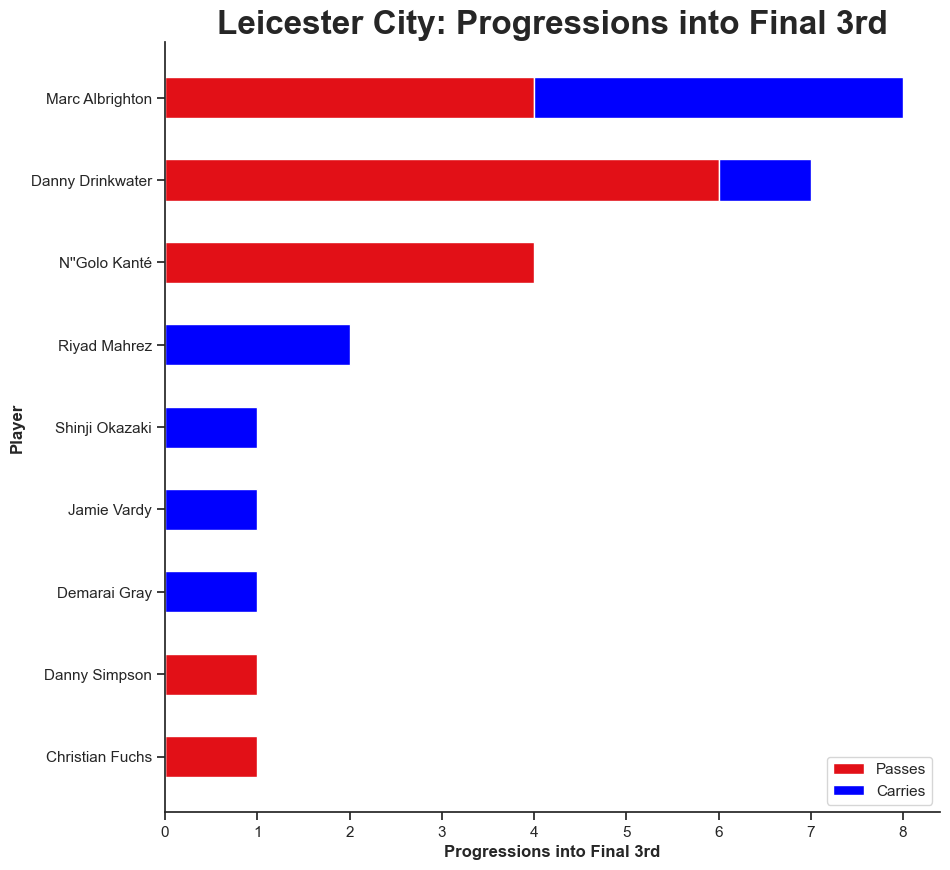

In [36]:
#create stacked bar chart
pass_colour='#e21017'
carry_colour='blue'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
progressions_df.sort_values(by='total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=progressions_df[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

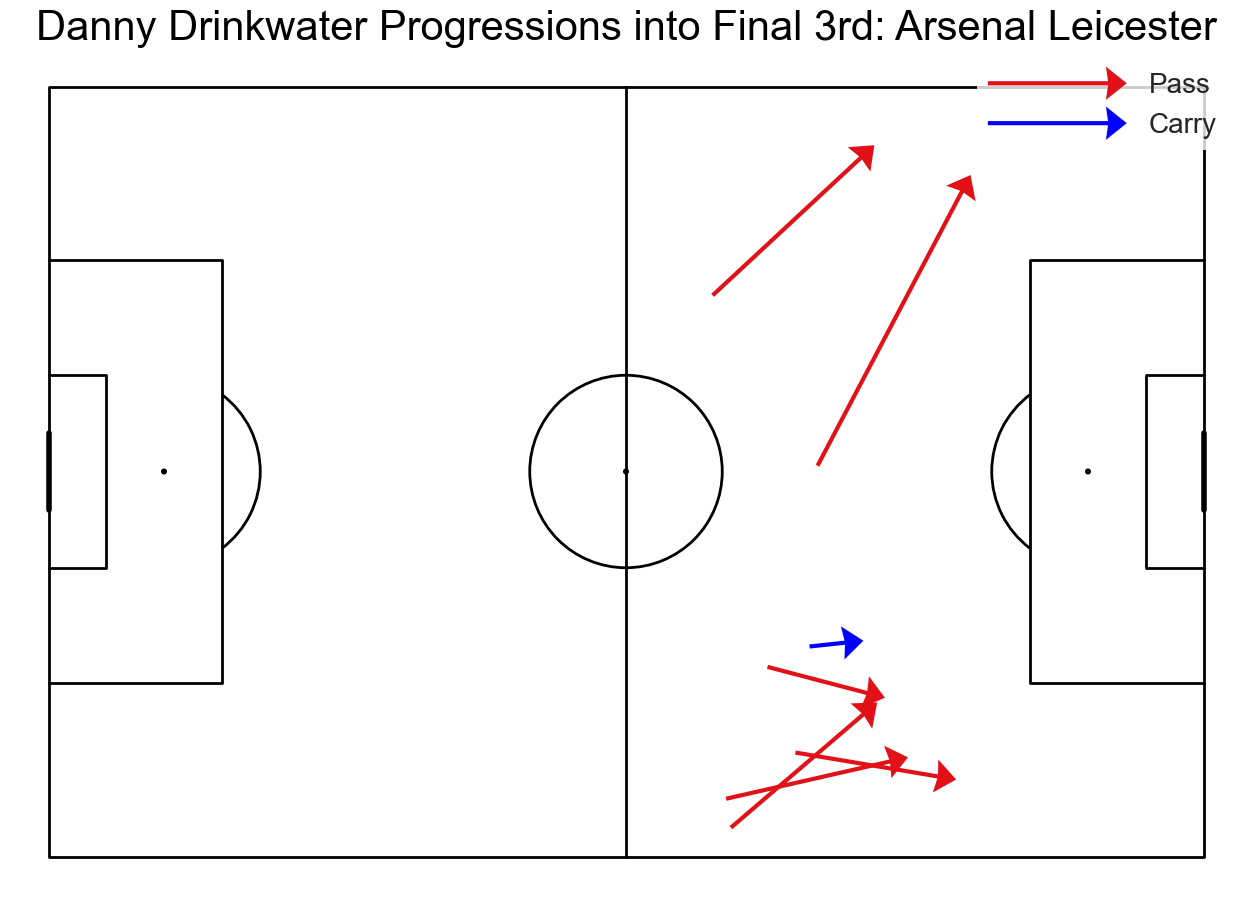

In [38]:
#visualise for a given player
player_name="Danny Drinkwater"

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Arsenal Leicester', fontsize=30,color='black')

# Example Two: Comparing Touch Maps

"Was player A's on ball position similar to player B's?"

## Data Manipulation

In [43]:
player1="Riyad Mahrez"
player2="Jamie Vardy"
touches=['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

In [44]:
player1_df=events_df[(events_df.player==player1)&(events_df.type.isin(touches))]
player2_df=events_df[(events_df.player==player2)&(events_df.type.isin(touches))]

## Visualise

In [45]:
#create colour map
colour1="white"
colour2="#c3c3c3"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

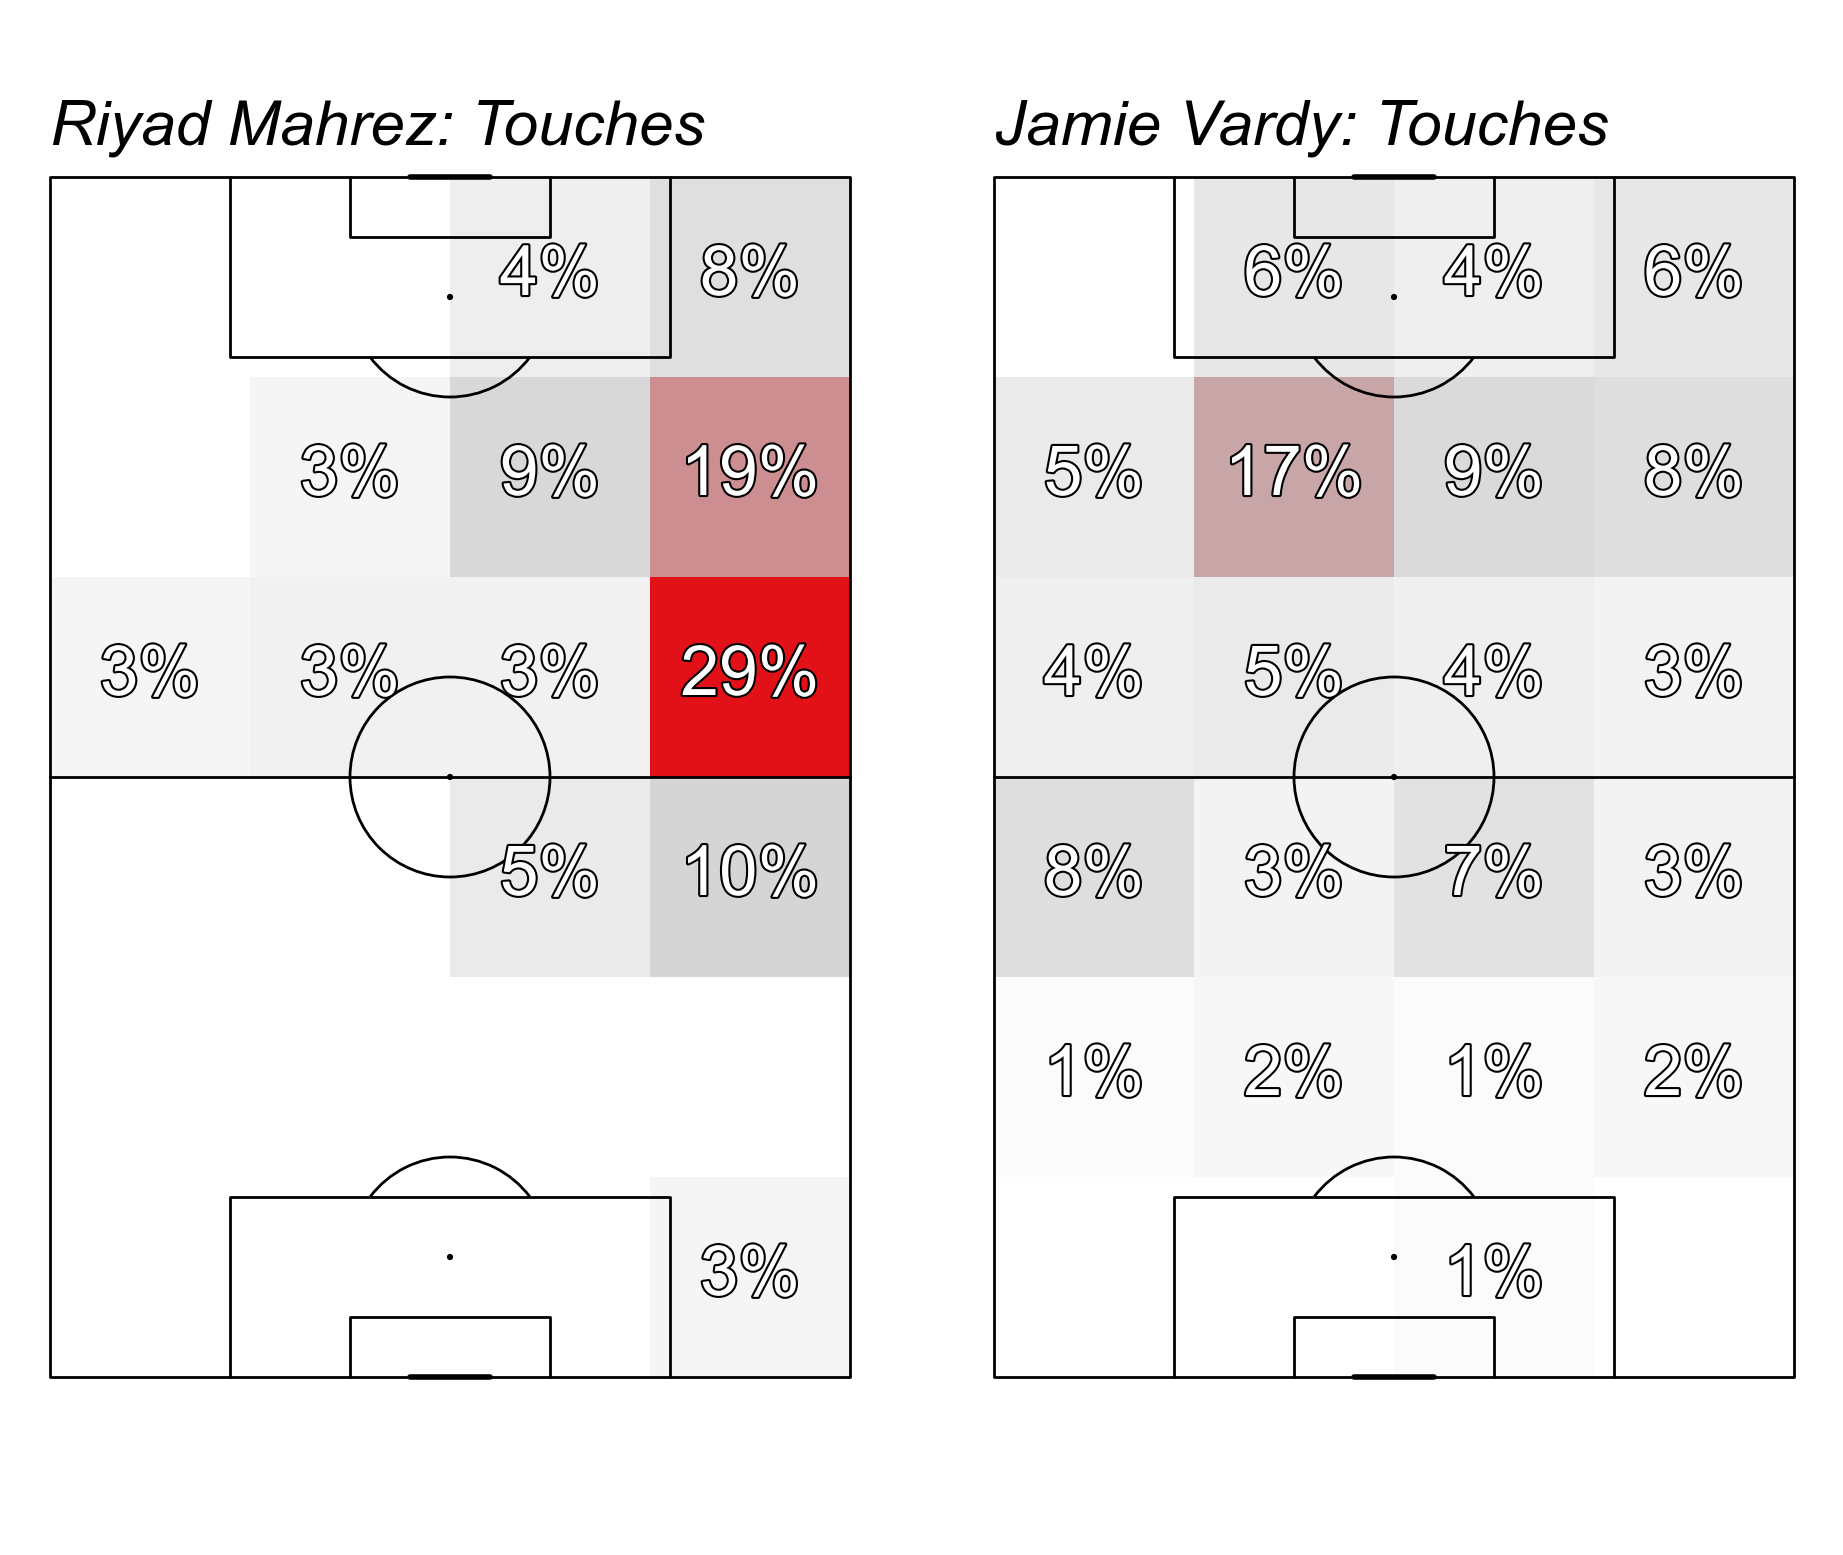

In [46]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05,
                      axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

#get data for heatmap
#player1
bin_statistic1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count',
bins=(6, 4),normalize=True)
#player2
bin_statistic2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count',
bins=(6, 4),normalize=True)

#calculate vmax value
#we want both our heatmaps to use the same colour spectrum
vmax1=bin_statistic1['statistic'].max()
vmax2=bin_statistic2['statistic'].max()

if vmax1>vmax2:
  vmax=vmax1
else:
  vmax=vmax2

#set vmin as zero
vmin=0

#plot heatmap for player1
heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player1}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][0],style='italic')


#plot heatmap for player2
heatmap2 = pitch.heatmap(bin_statistic2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate2 = pitch.label_heatmap(bin_statistic2, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][1],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player2}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][1],style='italic')

# Bonus

Get top xG Performers across the tournament. Create a shot map for the top player.

In [47]:
# get event data for entire season
comp_events_df=sb.competition_events(
     country='Europe',
     division='UEFA Euro',
     season='2024',
     gender="male")

/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open da

In [48]:
comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
comp_events_df[['pass_end_x', 'pass_end_y']] = comp_events_df['pass_end_location'].apply(pd.Series)
comp_events_df[['carry_end_x', 'carry_end_y']] = comp_events_df['carry_end_location'].apply(pd.Series)

/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_2102/2447140862.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_2102/2447140862.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_2102/2447140862.py:2: PerformanceWarning: DataFrame is highly fragmented.  

In [49]:
# get non penalty shots and non penalty goals
shots_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")]
goals_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")&(comp_events_df.shot_outcome=="Goal")]

#shots
#get count for each player, include team info
shots_count=shots_df.groupby(['player','team']).size().reset_index()

#rename second column
shots_count.rename(columns={shots_count.columns[2]: "np Shots" }, inplace = True)


#goals
#get count for each player, include team info
goals_count=goals_df.groupby(['player', 'team']).size().reset_index()

#rename second column
goals_count.rename(columns={goals_count.columns[2]: "np Goals" }, inplace = True)


#xG
#get count for each player, include team info
xg_sum=shots_df.groupby(['player', 'team'])['shot_statsbomb_xg'].sum().reset_index()

#rename second column
xg_sum.rename(columns={xg_sum.columns[2]: "np xG" }, inplace = True)

#round up to 2 decimal places
xg_sum['np xG']=xg_sum['np xG'].round(2)

In [50]:
#combine dataframes
shot_stats=pd.merge(shots_count, goals_count,
                    how="outer", on=["player", "team"])

shot_stats=pd.merge(shot_stats, xg_sum,
                    how="outer", on=["player", "team"])

In [51]:
#add 0 where value is NaN
shot_stats=shot_stats.fillna(0)

#sort to get top goalscorers, change by=' ' to get top xG, or top Shots
shot_stats=shot_stats.sort_values(by='np xG', ascending=False)

In [52]:
shot_stats.head(10)

,player,team,np Shots,np Goals,np xG
109,Harry Kane,England,17,2.0,2.27
154,Kai Havertz,Germany,17,0.0,2.21
56,Cristiano Ronaldo dos Santos Aveiro,Portugal,22,0.0,2.19
206,Memphis Depay,Netherlands,18,1.0,1.95
276,Romelu Lukaku Menama,Belgium,11,0.0,1.75
171,Kylian Mbappé Lottin,France,23,0.0,1.72
173,Lamine Yamal Nasraoui Ebana,Spain,18,1.0,1.59
42,Breel-Donald Embolo,Switzerland,8,2.0,1.57
329,Álvaro Borja Morata Martín,Spain,14,1.0,1.57
53,Christoph Baumgartner,Austria,8,1.0,1.55


In [53]:
#Shot map for top scorer
xg_player=shot_stats.player.iloc[0]

player_goals_df=goals_df[(goals_df.player==xg_player)]

player_shots_df=shots_df[(shots_df.player==xg_player)&(shots_df.shot_outcome!="Goal")]

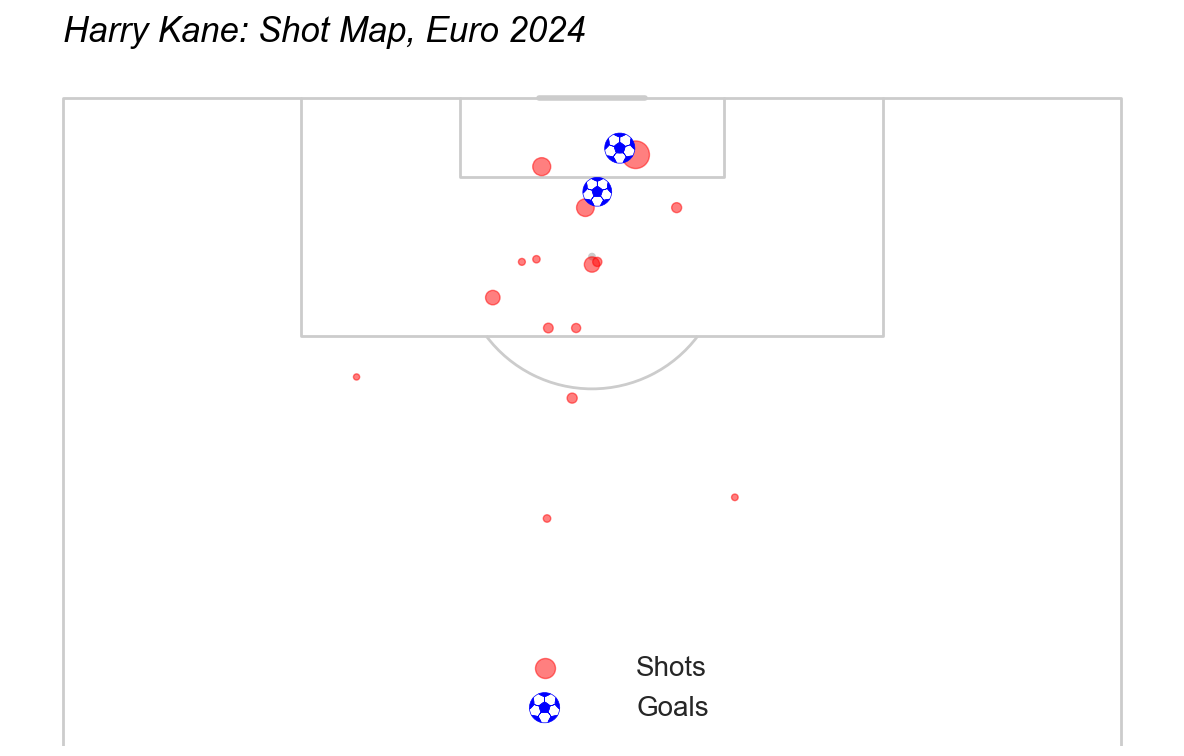

In [54]:
pitch = VerticalPitch(pitch_type='statsbomb',half=True,pad_bottom=-11)
fig, ax = pitch.draw(figsize=(12, 10))

shot_colour='red'
goal_colour='blue'

shots = pitch.scatter(player_shots_df.x, player_shots_df.y,
#make size relative to xG value
s=player_shots_df.shot_statsbomb_xg*1000,
c=shot_colour,
label='Shots',
marker='o',
alpha=0.5,
ax=ax)

goals = pitch.scatter(player_goals_df.x, player_goals_df.y,
#make size relative to xG value
s=player_goals_df.shot_statsbomb_xg*1000,
c='white',
edgecolors=goal_colour,
label='Goals',
marker='football',
ax=ax)

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

ax_text(0, 125, f'{xg_player}: Shot Map, Euro 2024', ha='left', c='black',va='center', fontsize=25,ax=ax,style='italic')

In [57]:


# Step 1: Retrieve all matches for the Premier League 2015–2016 season
competition_id = 2  # Premier League
season_id = 27      # 2015–2016 season

# Fetch all matches in this competition and season
pl_matches = sb.matches(competition_id=competition_id, season_id=season_id)

# Step 2: Get match IDs for filtering
pl_match_ids = pl_matches['match_id'].unique()

# Step 3: Retrieve all event data for these matches and filter for passes
passes_list = []  # Store passes from all matches
for match_id in pl_match_ids:
    # Fetch event data for the match
    events = sb.events(match_id=match_id)
    
    # Filter for passes
    passes = events[events['type'] == 'Pass']
    passes_list.append(passes)

# Combine all passes into a single DataFrame
pl_passes = pd.concat(passes_list, ignore_index=True)

# Step 4: Save or inspect the data
# Save to CSV
pl_passes.to_csv("premier_league_2015_2016_passes.csv", index=False)

# Inspect the data
print(pl_passes.head())
print(f"Total passes: {pl_passes.shape[0]}")


  ball_receipt_outcome ball_recovery_recovery_failure carry_end_location  \
0                  NaN                            NaN                NaN   
1                  NaN                            NaN                NaN   
2                  NaN                            NaN                NaN   
3                  NaN                            NaN                NaN   
4                  NaN                            NaN                NaN   

  clearance_aerial_won clearance_body_part clearance_head clearance_left_foot  \
0                  NaN                 NaN            NaN                 NaN   
1                  NaN                 NaN            NaN                 NaN   
2                  NaN                 NaN            NaN                 NaN   
3                  NaN                 NaN            NaN                 NaN   
4                  NaN                 NaN            NaN                 NaN   

  clearance_right_foot counterpress dribble_nutmeg  ... 

Total passes with the head: 17999


/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_2102/3347639811.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_passes[['x', 'y']] = pd.DataFrame(head_passes['location'].tolist(), index=head_passes.index)
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_2102/3347639811.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_passes[['x', 'y']] = pd.DataFrame(head_passes['location'].tolist(), index=head_passes.index)
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_210

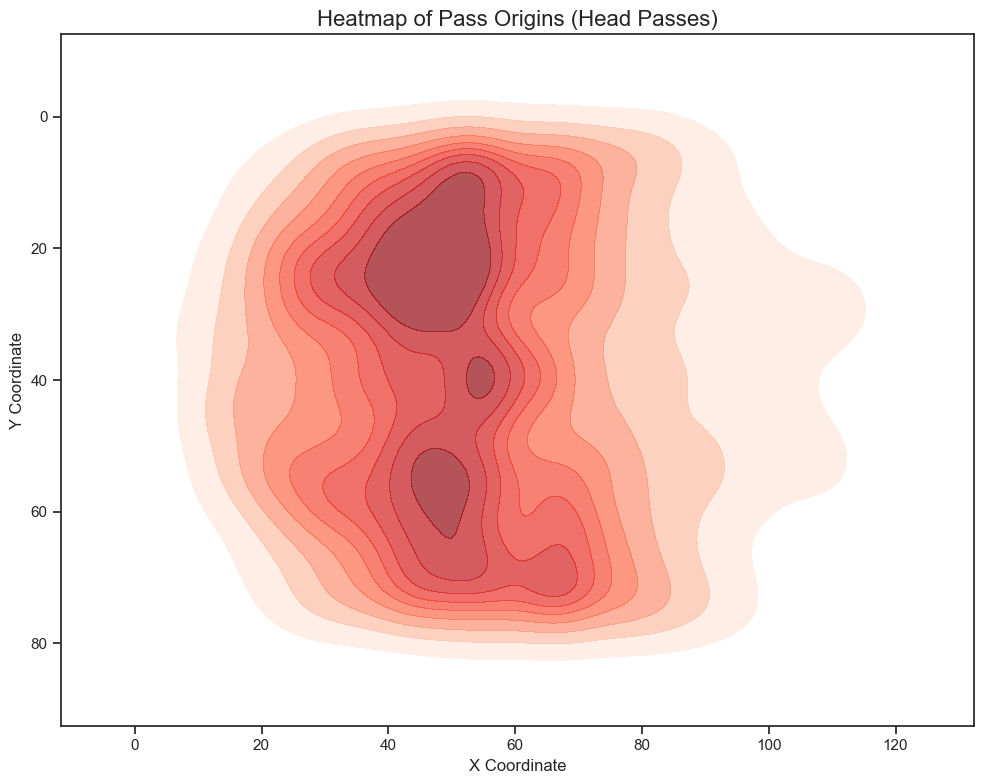

In [73]:
# Step 1: Filter passes with 'pass.body_part.name' equal to 'Head'
head_passes = pl_passes[pl_passes['pass_body_part'] == 'Head']

# Step 2: Inspect the filtered data
print(f"Total passes with the head: {head_passes.shape[0]}")

# Step 3: Visualize the passes with heatmaps
# Extract the start and end locations of head passes
head_passes[['x', 'y']] = pd.DataFrame(head_passes['location'].tolist(), index=head_passes.index)
head_passes[['end_x', 'end_y']] = pd.DataFrame(head_passes['pass_end_location'].tolist(), index=head_passes.index)

# Heatmap of pass origins (passes made with the head)
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=head_passes['x'], y=head_passes['y'], cmap="Reds", fill=True, alpha=0.7
)
plt.title("Heatmap of Pass Origins (Head Passes)", fontsize=16)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.gca().invert_yaxis()  # Invert Y-axis for soccer pitch orientation
plt.tight_layout()
plt.show()


In [79]:
completed_passes = pl_passes[pl_passes['pass_outcome'] == 'Complete']
print(f"Total completed passes: {completed_passes.shape[0]}")



# Step 1: Filter passes with 'pass.outcome.name' equal to 'Incomplete'
incomplete_passes = pl_passes[pl_passes['pass_outcome'] == 'Incomplete']

# Step 2: Inspect the filtered data

print(f"Total incomplete passes: {incomplete_passes.shape[0]}")

Total completed passes: 0
Total incomplete passes: 75035


In [60]:
# Step 1: Print all available column names
print("Column names in the DataFrame:")
print(pl_passes.columns)

# Step 2: Inspect the first few rows to understand the data structure
print("\nFirst few rows of the data:")
print(pl_passes.head())

# Step 3: Inspect unique values of a relevant column to analyze its categories
# Example: Check unique values in 'type' or any other suspected column
print("\nUnique values in the 'type' column:")
print(pl_passes['type'].unique())

# Step 4: Identify columns containing relevant data about passes
# Example: Check sub-keys within passes if nested JSON exists
for col in pl_passes.columns:
    if 'pass' in col:
        print(f"Example data from column '{col}':")
        print(pl_passes[col].dropna().unique()[:5])  # Show a sample of unique values


Column names in the DataFrame:
Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg',
       ...
       'block_save_block', 'shot_deflected', 'player_off_permanent',
       'goalkeeper_success_in_play', 'shot_follows_dribble',
       'goalkeeper_lost_out', 'half_start_late_video_start',
       'goalkeeper_lost_in_play', 'goalkeeper_penalty_saved_to_post',
       'goalkeeper_saved_to_post'],
      dtype='object', length=118)

First few rows of the data:
  ball_receipt_outcome ball_recovery_recovery_failure carry_end_location  \
0                  NaN                            NaN                NaN   
1                  NaN                            NaN                NaN   
2                  NaN                            NaN                NaN   
3                  NaN                  

TypeError: unhashable type: 'list'